## 📊 Fase 1: Análise de Correlação e Regressão Linear

Este trabalho tem como objetivo entender a relação linear entre os dados.  
Serão realizadas duas análises principais:

- **Correlação:** Mede a intensidade da associação linear entre duas variáveis.
- **Regressão:** Permite prever valores de uma variável com base em outra.

A correlação foca na associação entre variáveis, enquanto a regressão é usada para previsões.

Considere os três grupos de dados do arquivo `datasetFase1.txt`.

---

### 📝 Tarefas

1. **Implemente duas funções:**
   - `correlacao(x, y)`: Calcula o coeficiente de correlação (r) entre dois vetores Nx1.
   - `regressao(x, y)`: Calcula os coeficientes da regressão linear (β₀ e β₁).

2. **Crie um script Python chamado `demo` que, para cada dataset, execute:**
   1. Gráfico de dispersão (use `scatter`).
   2. Cálculo do coeficiente de correlação.
   3. Traçado da linha de regressão no gráfico de dispersão (use `plot`).
   4. Exibição dos coeficientes de correlação e regressão no gráfico (use `title`).

3. **Questão final:**  
   Qual dos datasets não é apropriado para regressão linear?

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
vetor_x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
vetor_y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]


vetor_x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
vetor_y2 = [9.14, 8.14, 8.47, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]


vetor_x3 = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19]
vetor_y3 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50]

In [59]:
def correlacao(x, y):
    n = len(x)
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    # Fórmula: r = Σ(x - x̄)(y - ȳ) / sqrt[Σ(x - x̄)²] * [Σ(y - ȳ)²]
    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador_x = sum((xi - media_x) ** 2 for xi in x)
    denominador_y = sum((yi - media_y) ** 2 for yi in y)
    r = numerador / np.sqrt(denominador_x * denominador_y)
    return r

In [60]:
def regressao(b0, b1, x):
    y = []
    for xi in x:
        y.append(b0 + b1 * xi)
    return np.array(y)

In [61]:
def getB1(x, y):
    n = len(x)
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    # Fórmula: b1 = Σ(x - x̄)(y - ȳ) / Σ(x - x̄)²
    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador = sum((xi - media_x) ** 2 for xi in x)

    b1 = numerador / denominador
    return b1

In [62]:
def getB0(x, y, b1):
    n = len(x)
    # Formúla: b0 = ȳ - b1*x̄
    media_x = sum(x) / n  # x̄
    media_y = sum(y) / n  # ȳ

    b0 = media_y - b1 * media_x
    return b0

In [63]:
def plot_dataset(x, y, b0, b1, r, title):
    plt.scatter(x, y, label="Dados")
    # Calcule os valores da linha de regressão antes de chamar plt.plot
    y_regressao = regressao(b0, b1, np.array(x))
    plt.plot(x, y_regressao, color="red", label="Regressão Linear")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{title}\nr = {r:.4f}\nβ₀ = {b0:.4f}, β₁ = {b1:.5f}")
    plt.legend()
    plt.show()


Analisando Dataset 1


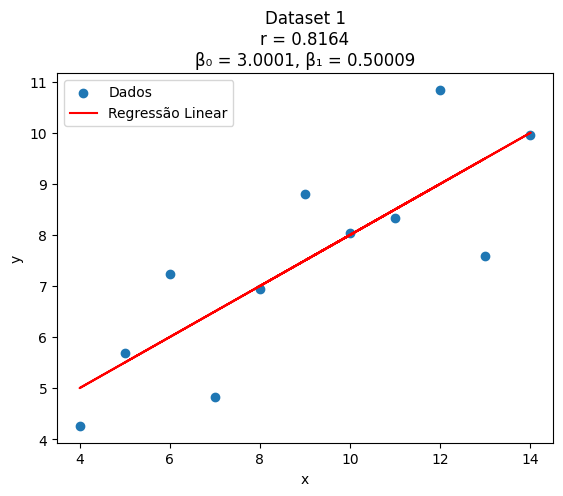


Analisando Dataset 2


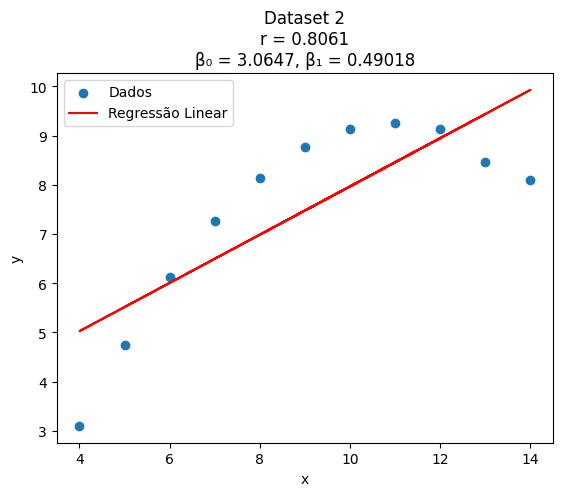


Analisando Dataset 3


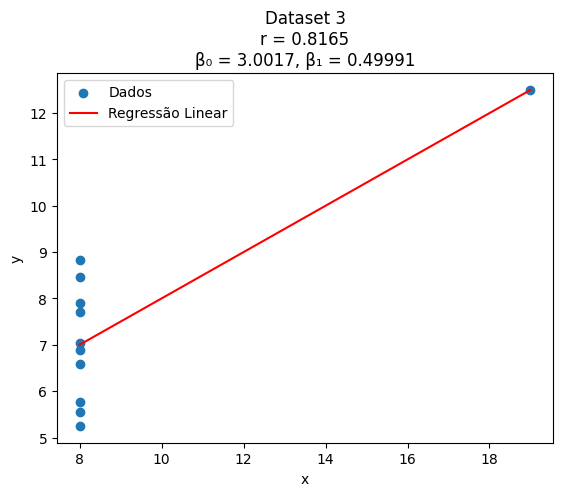

In [64]:
dados = {
    "x1": vetor_x1,
    "y1": vetor_y1,
    "x2": vetor_x2,
    "y2": vetor_y2,
    "x3": vetor_x3,
    "y3": vetor_y3,
}
end = len(dados.keys()) // 2 + 1
for i in range(1, end):
    print(f"\nAnalisando Dataset {i}")
    x_key = f"x{i}"
    y_key = f"y{i}"
    x = dados[x_key]
    y = dados[y_key]

    b1 = getB1(x, y)
    b0 = getB0(x, y, b1)

    r = correlacao(x, y)

    plot_dataset(x, y, b0, b1, r, f"Dataset {i}")

## 📈 Análise dos DataSets

### Dataset 1
✅ Pode ser resolvido com uma regressão linear simples.

**Dataset 2
⚠️ Não pode ser resolvido com regressão linear simples, pois apresenta uma relação não-linear entre as variáveis.  
🔎 O ideal seria utilizar uma regressão polinomial.

### Dataset 3
🚫 Apresenta dados discrepantes que impedem a aplicação de regressão linear simples.  
A maioria dos pontos está concentrada em uma única coordenada x, tornando a análise linear inadequada.